In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('/content/Zomato data .csv')

In [21]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [22]:
df['rate'] = df['rate'].str.split('/').str[0]

In [77]:
df['rate'] = df['rate'].astype(float)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [25]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [26]:
df['listed_in(type)'].value_counts()

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


<Axes: xlabel='listed_in(type)', ylabel='count'>

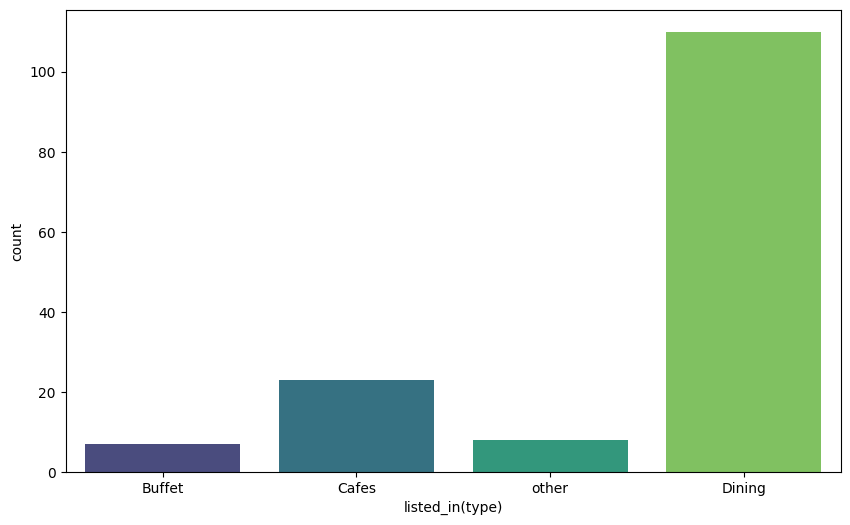

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['listed_in(type)'],palette='viridis')

### This indicates that customers overwhelmingly prefer ordering from dining restaurants

In [32]:
df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)

,votes
listed_in(type),
Dining,20363
other,9367
Cafes,6434
Buffet,3028


<Axes: xlabel='listed_in(type)'>

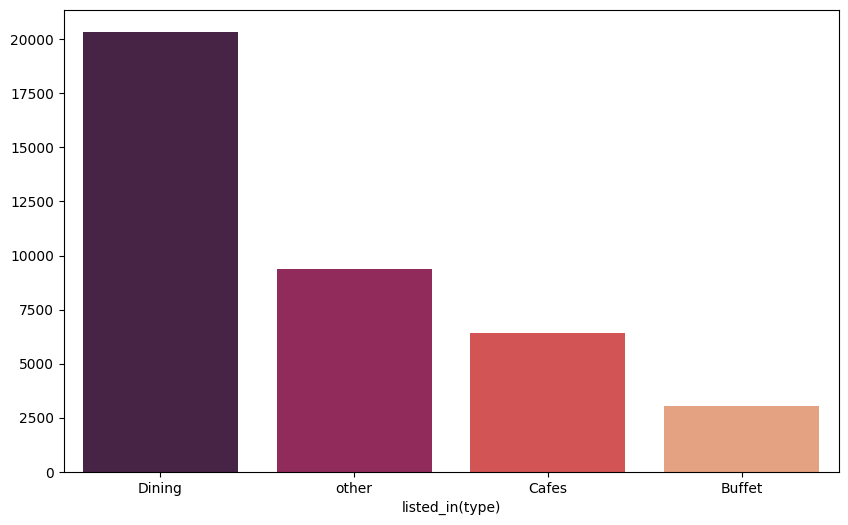

In [96]:
plt.figure(figsize=(10,6))
result = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
sns.barplot(x=result.index,y=reseult.values,palette='rocket')

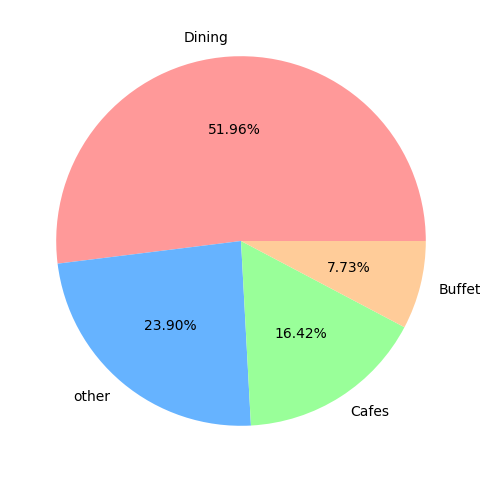

In [94]:
plt.figure(figsize=(10,6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(reseult,labels=reseult.index,autopct='%1.2f%%',colors=colors)
plt.show()

### The respective number of votes each type of resturant got are below
- Dining:	20363
- other:	9367
- Cafes:	6434
- Buffet:	3028

#### It was obvious that dining would end up getting most votes since it was most preferred by the customers

<Axes: xlabel='rate', ylabel='Density'>

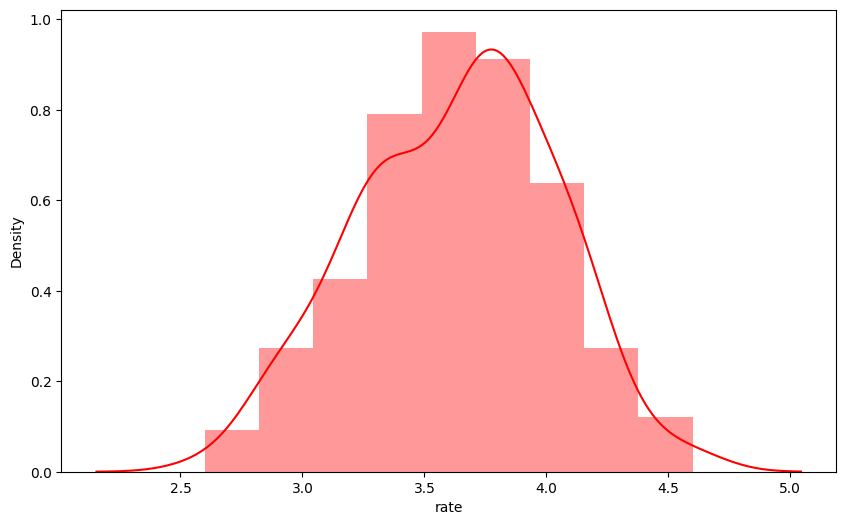

In [97]:
plt.figure(figsize=(10,6))
sns.distplot(df['rate'],color='red')

#### By analyzing the distribution plot of ratings, we observe that the majority of them fall within the 3.5 to 4 range.

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

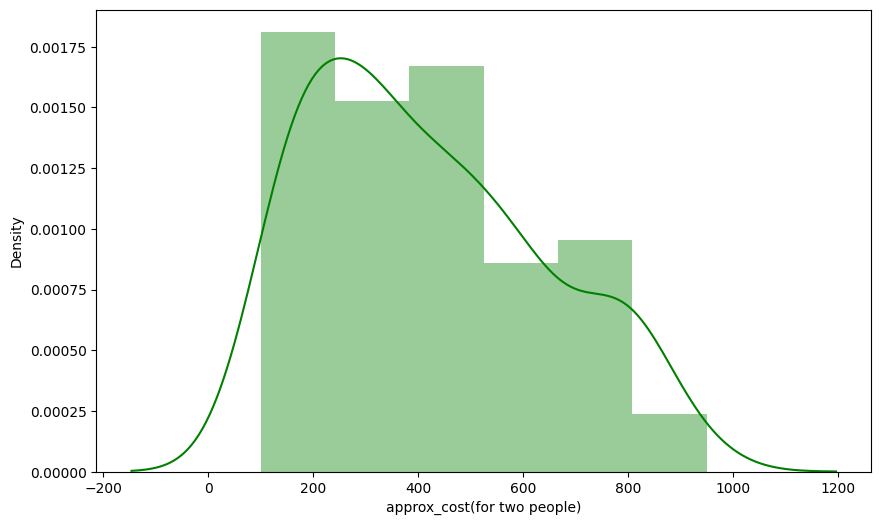

In [98]:
plt.figure(figsize=(10,6))
sns.distplot(df['approx_cost(for two people)'],color='green')

#### By analyzing the distribution plot of approx_cost, we observe that the majority of them fall within the 200-400 range, indicating people don't usually prefer going high-end restaurants on a daily basis.

In [60]:
round(df[df['online_order']=='Yes']['approx_cost(for two people)'].mean(),2)

510.34

#### The average spending on online orders is ₹510.34

In [68]:
round(df[df['online_order']=='No']['approx_cost(for two people)'].mean(),2)

358.89

#### The average spending on online orders is ₹358.89

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

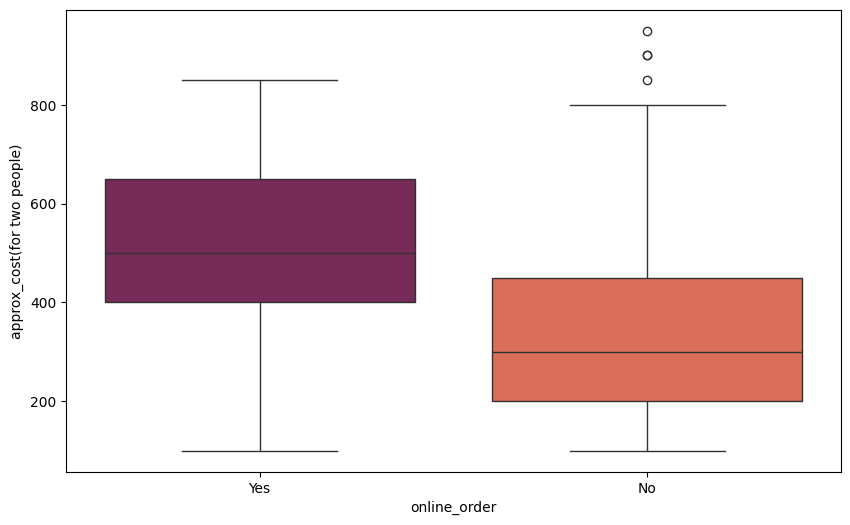

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['online_order'],y=df['approx_cost(for two people)'],palette='rocket')

#### By creating a box plot to compare the distribution of online and offline order costs, we found that customers typically spend more when ordering online.

<Axes: xlabel='online_order', ylabel='rate'>

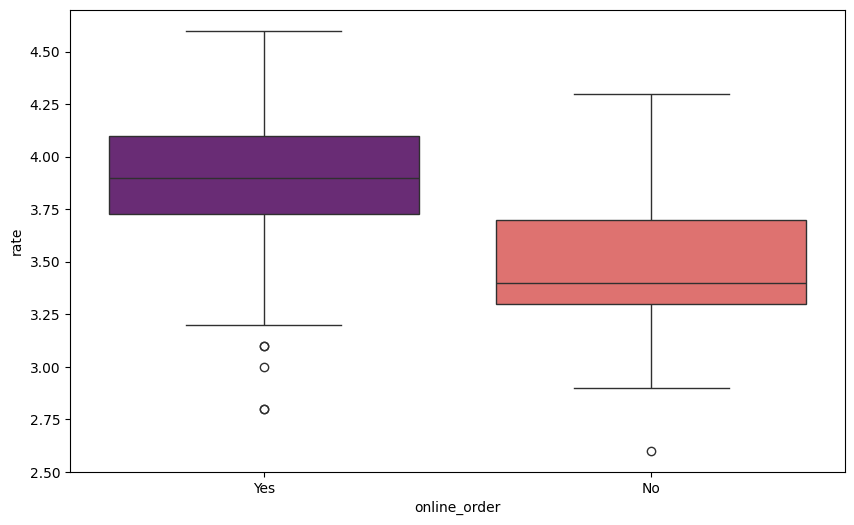

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['online_order'],y=df['rate'],palette='magma')

#### By creating a box plot to compare the distribution of online and offline order ratings, we found that customers typically rate more when ordering online.

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

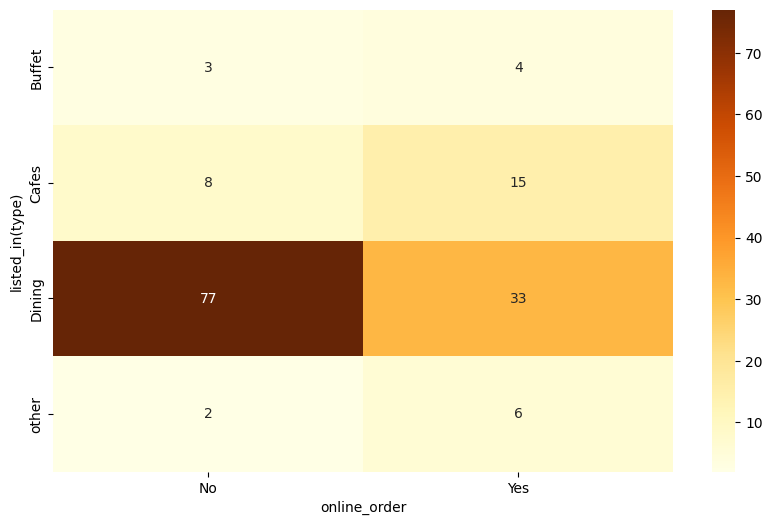

In [93]:
plt.figure(figsize=(10,6))
pivoted = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivoted,annot=True,cmap='YlOrBr')

#### Dining restaurants receive more offline orders, while cafes see a higher number of online orders. Buffets, on the other hand, have an equal share of both